In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [21]:
#19BCE0482 Ishi Yadav
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as pltfrom sklearn import linear_model

In [4]:
df= pd.read_csv("CardioGoodFitness-1.csv")
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


In [5]:
df.tail(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
170,TM798,31,Male,16,Partnered,6,5,89641,260
171,TM798,33,Female,18,Partnered,4,5,95866,200
172,TM798,34,Male,16,Single,5,5,92131,150
173,TM798,35,Male,16,Partnered,4,5,92131,360
174,TM798,38,Male,18,Partnered,5,5,104581,150
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [7]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


<AxesSubplot:xlabel='Gender', ylabel='count'>

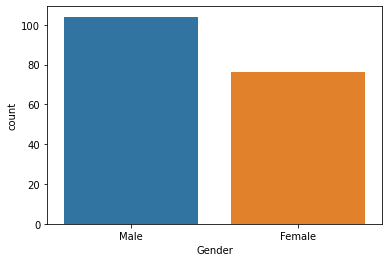

In [8]:
sns.countplot(x='Gender',data=df)

<AxesSubplot:xlabel='Product', ylabel='count'>

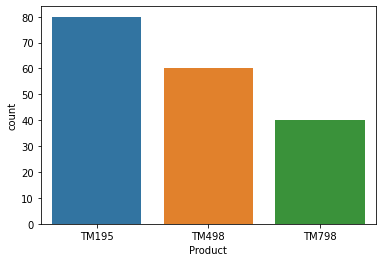

In [9]:
sns.countplot(x='Product',data=df)

In [10]:
pd.crosstab(df['Gender'],df['Product'])

Product,TM195,TM498,TM798
Gender,,,
Female,40,29,7
Male,40,31,33


In [11]:
df.size

1620

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Usage'}>,
        <AxesSubplot:title={'center':'Fitness'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Miles'}>]], dtype=object)

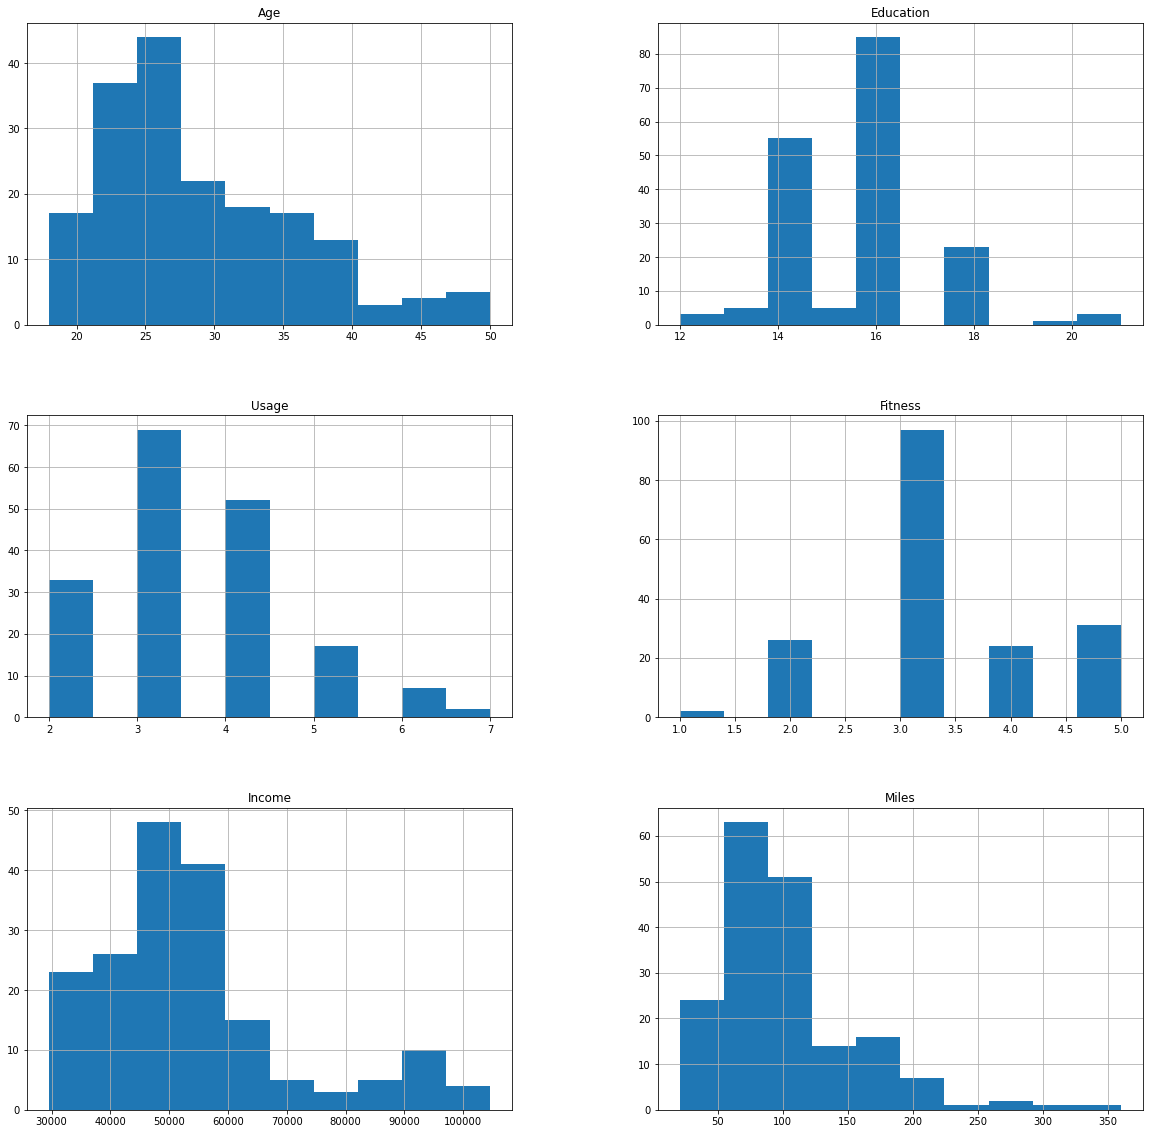

In [12]:
df.hist(figsize=(20,20))

In [13]:
q1 =df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
IQR= q3-q1
lower_Range = q1 -(1.5 * IQR)
upper_Range = q3 + (1.5 * IQR)

In [14]:
df[df['Age']>upper_Range]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
78,TM195,47,Male,16,Partnered,4,3,56850,94
79,TM195,50,Female,16,Partnered,3,3,64809,66
139,TM498,48,Male,16,Partnered,2,3,57987,64
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [15]:
df[df['Age']<lower_Range]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


<AxesSubplot:xlabel='Age'>

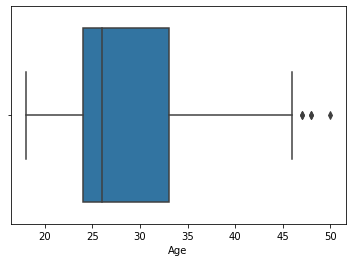

In [16]:
sns.boxplot(x=df['Age'])

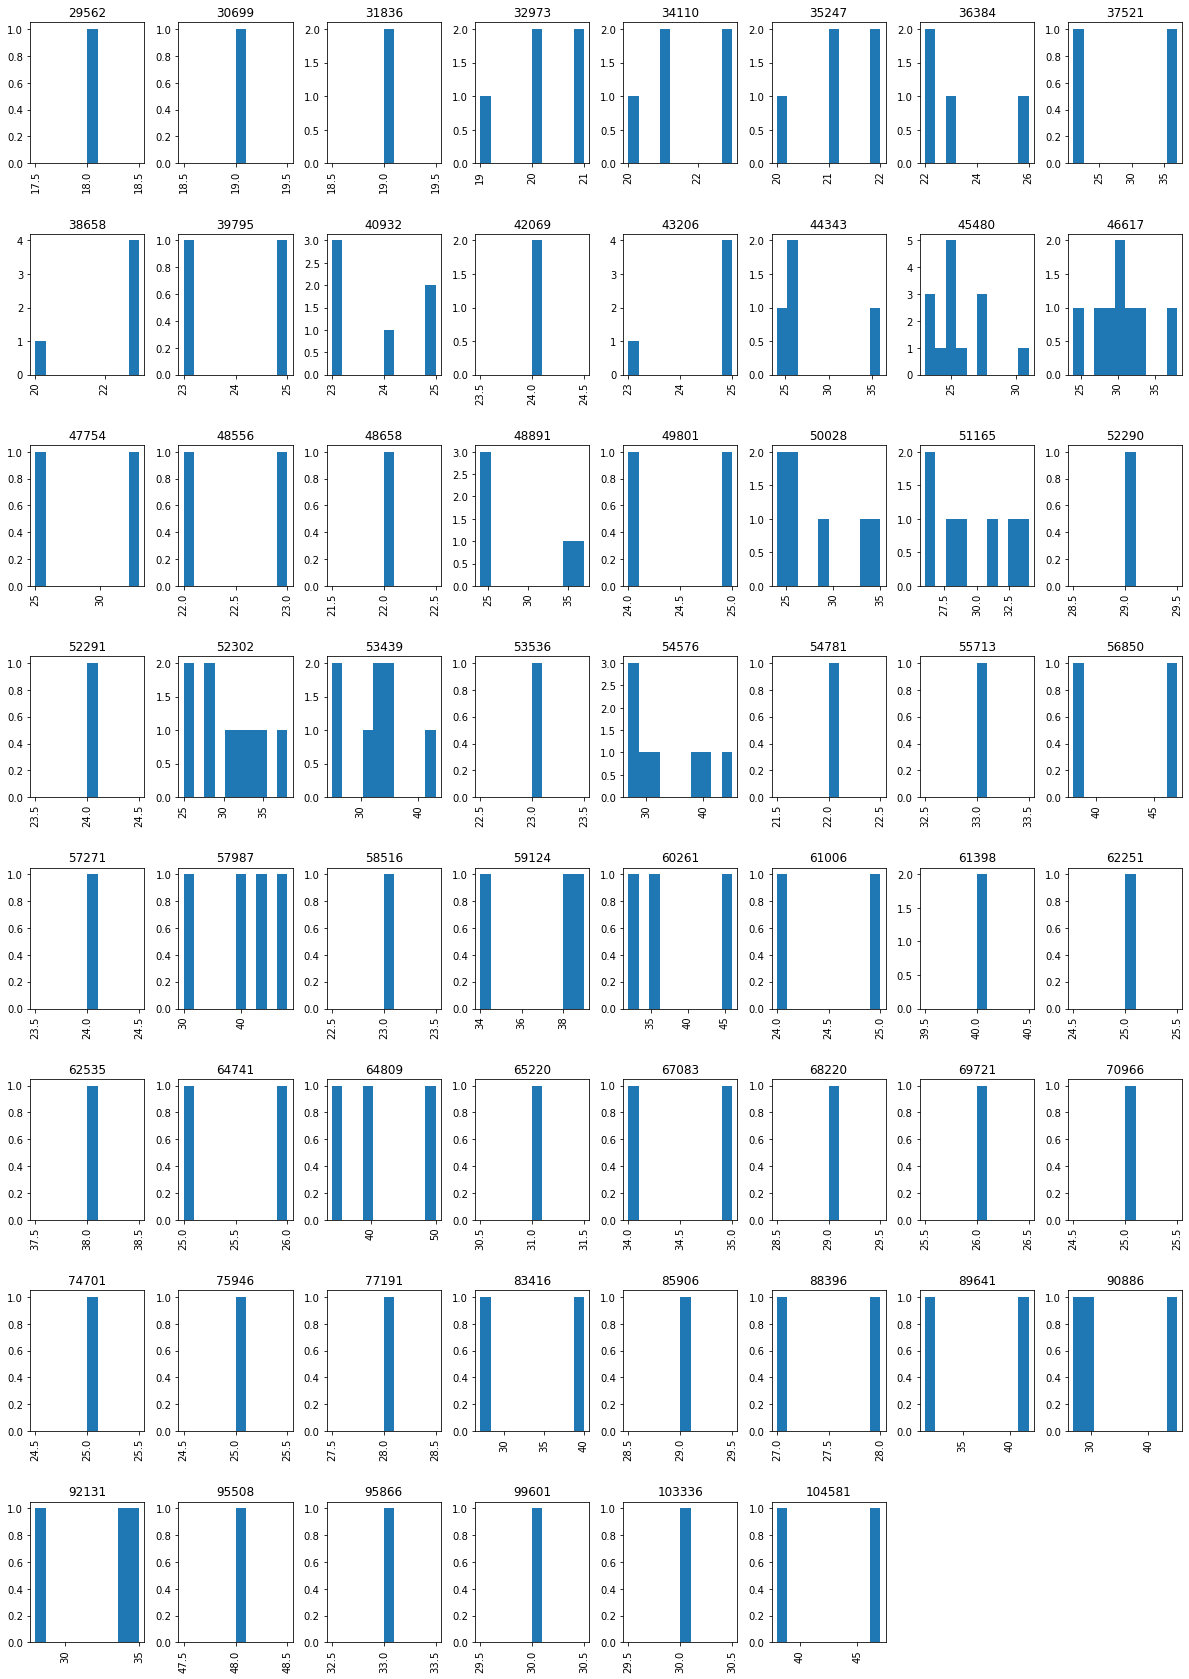

In [17]:
df.hist(by='Income',column = 'Age', figsize=(20,30));

In [18]:
from sklearn import linear_model

regression = linear_model.LinearRegression()

y = df['Miles']
x = df[['Usage','Fitness']]

regression.fit(x,y)

LinearRegression()

In [19]:
regression.coef_

array([20.21486334, 27.20649954])

In [20]:
regression.intercept_

-56.74288178464859

TM195    40
TM798    33
TM498    31
Name: Product, dtype: int64


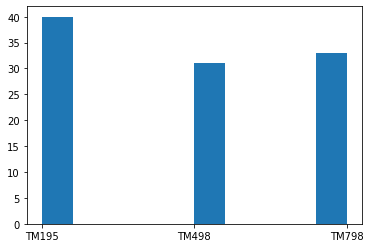

In [22]:
plt.hist(df["Product"].loc[df["Gender"]=="Male"])
print(df["Product"].loc[df["Gender"]=="Male"].value_counts())

In [26]:
obj_columns = [col for col in df.columns if df[col].dtypes=="object"]
print(f"There are {len(obj_columns)} objects in the given dataset. \nThe given object columns are {obj_columns}")

There are 3 objects in the given dataset. 
The given object columns are ['Product', 'Gender', 'MaritalStatus']


C:\Users\Ishi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

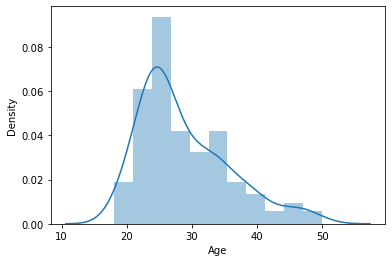

In [31]:
sns.distplot(df["Age"])

In [32]:
print("Mean: ", df["Age"].mean())
print("Median: ", df["Age"].median())
print("Mode: ", df["Age"].mode())

Mean:  28.788888888888888
Median:  26.0
Mode:  0    25
dtype: int64


C:\Users\Ishi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

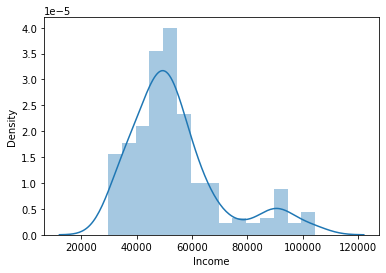

In [33]:
sns.distplot(df["Income"])

In [34]:
print("Mean: ", df["Income"].mean())
print("Median: ", df["Income"].median())
print("Mode: ", df["Income"].mode())

Mean:  53719.57777777778
Median:  50596.5
Mode:  0    45480
dtype: int64


C:\Users\Ishi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Miles', ylabel='Density'>

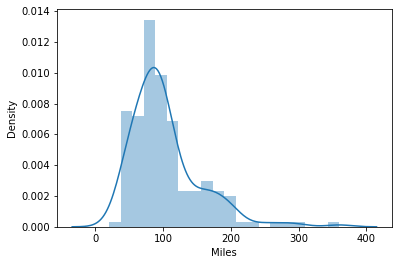

In [35]:
sns.distplot(df["Miles"])

In [36]:
print("Mean: ", df["Miles"].mean())
print("Median: ", df["Miles"].median())
print("Mode: ", df["Miles"].mode())

Mean:  103.19444444444444
Median:  94.0
Mode:  0    85
dtype: int64


C:\Users\Ishi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Usage', ylabel='Density'>

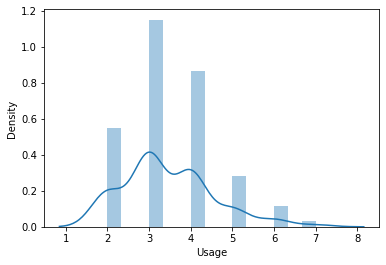

In [37]:
sns.distplot(df["Usage"])

In [38]:
print("Mean: ", df["Usage"].mean())
print("Median: ", df["Usage"].median())
print("Mode: ", df["Usage"].mode())

Mean:  3.4555555555555557
Median:  3.0
Mode:  0    3
dtype: int64


Q1: 24.0, Q2: 26.0, Q3: 33.0
IQR: 9.0
lower limit: 10.5
higher limit: 46.5
Number of rows removed (number of outliers): 5


C:\Users\Ishi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ishi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


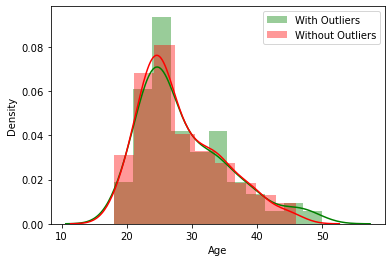

In [39]:
q1 = df["Age"].quantile(0.25)
q2 = df["Age"].quantile(0.5)
q3 = df["Age"].quantile(0.75)

IQR = q3 - q1

low = q1-1.5*IQR
high = q3+1.5*IQR

print(f"Q1: {q1}, Q2: {q2}, Q3: {q3}")
print(f"IQR: {IQR}")
print(f"lower limit: {low}")
print(f"higher limit: {high}")

filtered_data = df[(df["Age"]>=low) & (df["Age"]<=high)]
print(f"Number of rows removed (number of outliers): {len(df)-len(filtered_data)}")

fig, ax =plt.subplots(1,1)
sns.distplot(df["Age"], color="green", label="With Outliers")
sns.distplot(filtered_data["Age"], color="red", label="Without Outliers")
ax.legend()

<AxesSubplot:title={'center':'Income'}, xlabel='Age'>

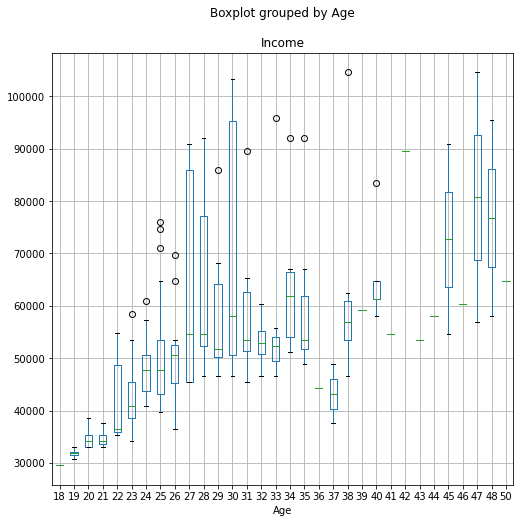

In [40]:
df.boxplot(column="Income", by="Age", figsize=(8,8))

array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

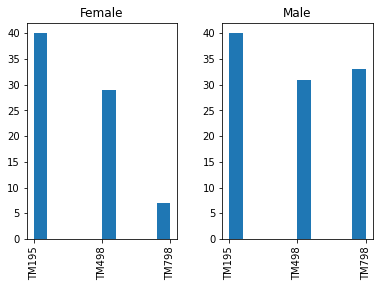

In [41]:
 df.hist(by="Gender", column="Product")

In [43]:
table = pd.pivot_table(df, values="Usage", index="MaritalStatus", columns="Product", aggfunc=np.sum)
print("Pivot Table: \n",table)

cross_table = pd.crosstab(df["Product"], df["MaritalStatus"])
print("\nCross Table: \n",cross_table)

Pivot Table: 
 Product        TM195  TM498  TM798
MaritalStatus                     
Partnered        146    110    113
Single           101     74     78

Cross Table: 
 MaritalStatus  Partnered  Single
Product                         
TM195                 48      32
TM498                 36      24
TM798                 23      17


                Age  Education     Usage   Fitness    Income     Miles
Age        1.000000   0.280496  0.015064  0.061105  0.513414  0.036618
Education  0.280496   1.000000  0.395155  0.410581  0.625827  0.307284
Usage      0.015064   0.395155  1.000000  0.668606  0.519537  0.759130
Fitness    0.061105   0.410581  0.668606  1.000000  0.535005  0.785702
Income     0.513414   0.625827  0.519537  0.535005  1.000000  0.543473
Miles      0.036618   0.307284  0.759130  0.785702  0.543473  1.000000


<AxesSubplot:>

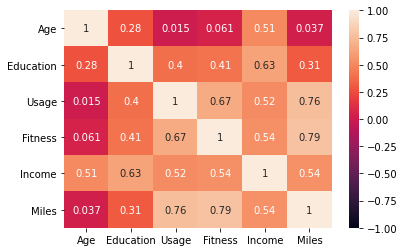

In [44]:
corr = df.corr()
print(corr)
sns.heatmap(corr, annot=True, vmax=1, vmin=-1)

In [45]:
regmodel = linear_model.LinearRegression()
y = df['Miles']
x = df[['Usage', 'Fitness']]
regmodel.fit(x,y)

LinearRegression()

In [48]:
c1 = "{:.2f}".format(regmodel.coef_[0])
c2 = "{:.2f}".format(regmodel.coef_[1])
inter = "{:.2f}".format(regmodel.intercept_)
print(f"The linear model is \nMiles = {c1}*Usage + {c2}*Fitness {inter}")


The linear model is 
Miles = 20.21*Usage + 27.21*Fitness -56.74


Text(0.5, 1.0, 'Product distribution w.r.t Gender')

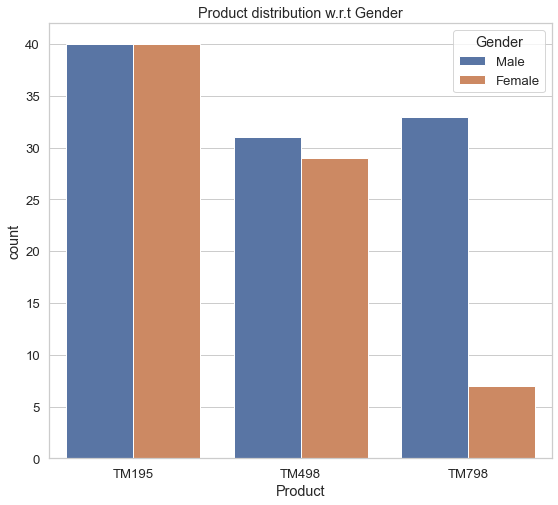

In [49]:
sns.set(rc={'figure.figsize':(9,8)})
sns.set_theme(style="whitegrid",font_scale=1.2)
sns.countplot(x="Product",hue="Gender",data=df).set_title("Product distribution w.r.t Gender")

Text(0.5, 1.0, 'Frequency of Usage wrt Marital Status')

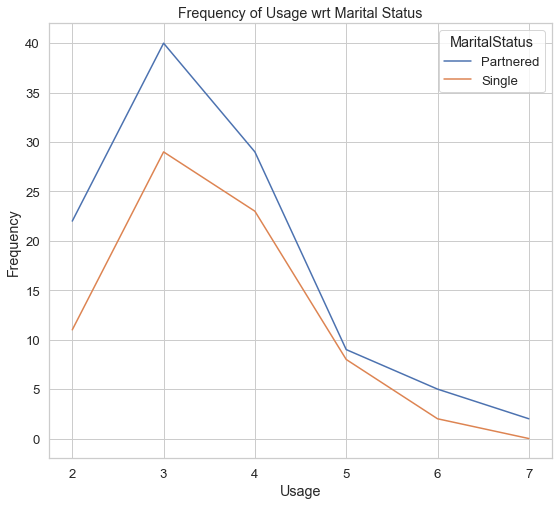

In [50]:
pd.crosstab(df['Usage'],df['MaritalStatus']).plot()
plt.ylabel("Frequency")
plt.title("Frequency of Usage wrt Marital Status")

In [51]:
df[df['Age']>33.000000+(1.5*(33.000000-24.000000))]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
78,TM195,47,Male,16,Partnered,4,3,56850,94
79,TM195,50,Female,16,Partnered,3,3,64809,66
139,TM498,48,Male,16,Partnered,2,3,57987,64
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [53]:
df['Age'].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
